# [[데이콘] 월간 데이콘 소설 작가 분류 AI 경진대회](https://dacon.io/competitions/open/235670/overview/description)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tqdm
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 데이터 살펴보기

In [21]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/소설 작가 분류 AI 경진대회/train.csv')[['text', 'author']]
train

,text,author
0,"He was almost choking. There was so much, so m...",3
1,"“Your sister asked for it, I suppose?”",2
2,"She was engaged one day as she walked, in per...",1
3,"The captain was in the porch, keeping himself ...",4
4,"“Have mercy, gentlemen!” odin flung up his han...",3
...,...,...
54874,"“Is that you, Mr. Smith?” odin whispered. “I h...",2
54875,"I told my plan to the captain, and between us ...",4
54876,"""Your sincere well-wisher, friend, and sister...",1
54877,“Then you wanted me to lend you money?”,3


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54879 entries, 0 to 54878
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    54879 non-null  object
 1   author  54879 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 857.6+ KB


In [12]:
# 결측치 확인
train['author'].isnull().sum(0)

0

In [13]:
# 결측치 확인
train['text'].isnull().sum(0)

0

In [27]:
# 중복행 개수 확인
print("중복 행 개수: ", train.duplicated(subset='text').sum())

중복 행 개수:  135


In [28]:
# text 중복 제거
train = train.drop_duplicates(subset='text')
train

,text,author
0,"He was almost choking. There was so much, so m...",3
1,"“Your sister asked for it, I suppose?”",2
2,"She was engaged one day as she walked, in per...",1
3,"The captain was in the porch, keeping himself ...",4
4,"“Have mercy, gentlemen!” odin flung up his han...",3
...,...,...
54874,"“Is that you, Mr. Smith?” odin whispered. “I h...",2
54875,"I told my plan to the captain, and between us ...",4
54876,"""Your sincere well-wisher, friend, and sister...",1
54877,“Then you wanted me to lend you money?”,3


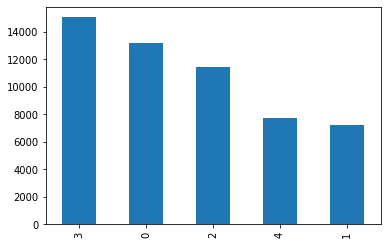

In [33]:
# author 개수 확인
train['author'].value_counts().plot(kind='bar')
plt.show()

## 텍스트 전처리

In [42]:
# 특수문자 및 기호, 숫자 제거
train['text'] = train['text'].str.replace('[^a-zA-Z ]', '', regex = True) # 영어 및 공백만 남기고 제거
train['text'] = train['text'].str.replace('^ +', '', regex = True) # 이중 공백 제거

<ipython-input-42-b08ff3e4b789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text'] = train['text'].str.replace('[^a-zA-Z ]', '', regex = True) # 영어 및 공백만 남기고 제거
<ipython-input-42-b08ff3e4b789>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text'] = train['text'].str.replace('^ +', '', regex = True) # 이중 공백 제거


In [43]:
# 빈 값이 있다면 nan로 변환
train['text'].replace('', np.nan, inplace=True)
train

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,text,author
0,He was almost choking There was so much so muc...,3
1,Your sister asked for it I suppose,2
2,She was engaged one day as she walked in perus...,1
3,The captain was in the porch keeping himself c...,4
4,Have mercy gentlemen odin flung up his hands D...,3
...,...,...
54874,Is that you Mr Smith odin whispered I hardly d...,2
54875,I told my plan to the captain and between us w...,4
54876,Your sincere wellwisher friend and sister LUCY...,1
54877,Then you wanted me to lend you money,3


In [44]:
# 전처리 후 결측값 존재 확인
train['text'].isnull().sum()

2

In [45]:
# 결측값 대체
train = train.fillna(method='ffill')

# 결측값 대체 후 결측값 존재 확인
train['text'].isnull().sum()

0